In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

from utilsOT import *
from algos import *

In [3]:
    #########   SETTING    #########
    np.random.seed(3)
    
    n_iter = 100000
    n_iter_2 = 100000
    n_iter_3 = 100000

    n_target = 10
    n_source = 15

    list_epsilon = [0,0.001,0.01,0.1]
    list_alpha_ASGD = [0.8]
    list_alpha_SAG = [0.001]
    
    rho_list_source = generate_list_rho(3)
    rho_list_target = generate_list_rho(3)

    X_target = sample_rho_batch(rho_list_target,n_target)
    nu = np.ones(n_target)
    nu = nu/np.sum(nu) 

    X_source = sample_rho_batch(rho_list_source,n_source)
    mu = np.ones(n_source)
    mu = mu/np.sum(mu)

    #########   Calculate v   #########
    v_ASGD1 = np.zeros([n_target,n_iter,len(list_epsilon),len(list_alpha_ASGD)])
    v_ASGD2 = np.zeros([n_source,n_iter_2,len(list_epsilon),len(list_alpha_ASGD)])
    v_ASGD3 = np.zeros([n_target,n_iter_3,len(list_epsilon),len(list_alpha_ASGD)])

    v_SAG1 = np.zeros([n_target,n_iter,len(list_epsilon),len(list_alpha_SAG)])
    v_SAG2 = np.zeros([n_source,n_iter_2,len(list_epsilon),len(list_alpha_SAG)])
    v_SAG3 = np.zeros([n_target,n_iter_3,len(list_epsilon),len(list_alpha_SAG)])
        
    for i_e in range(len(list_epsilon)):
        epsilon = list_epsilon[i_e]
        #########   Averaged SGD   #########
        for i_a in range(len(list_alpha_ASGD)):
            alpha = list_alpha_ASGD[i_a]
            v_ASGD1[:,:,i_e,i_a] = runASGD_discrete(nu,mu,X_target,X_source, epsilon, alpha, n_iter)
            v_ASGD2[:,:,i_e,i_a] = runASGD_discrete(mu,mu,X_source,X_source, epsilon, alpha, n_iter_2)
            v_ASGD3[:,:,i_e,i_a] = runASGD_discrete(nu,nu,X_target,X_target, epsilon, alpha, n_iter_2)
        
        #########   SAG   #########
        for i_a in range(len(list_alpha_SAG)):
            alpha = list_alpha_SAG[i_a]
            v_SAG1[:,:,i_e,i_a] = runSAG(nu,mu,X_target,X_source,epsilon,alpha,n_iter)
            v_SAG2[:,:,i_e,i_a] = runSAG(mu,mu,X_source,X_source,epsilon,alpha,n_iter_2)
            v_SAG3[:,:,i_e,i_a] = runSAG(nu,nu,X_target,X_target,epsilon,alpha,n_iter_2)

    #########   plot v   #########
    # for idx in range(n_target):
    #     plt.figure()
    #     plt.plot(v_ASGD1[idx,:,0,0],label = 'ASGD')
    #     plt.plot(v_SAG1[idx,:,0,0], label = 'SAG')
    #     plt.plot(v_ASGD1[idx,:,1,0], label = 'ASGDr')
    #     plt.plot(v_SAG1[idx,:,1,0], label = 'SAGr')
    #     plt.xscale('log')
    #     plt.legend()
    #     plt.show()
    
    # for idx in range(n_source):
    #     plt.figure()
    #     plt.plot(v_ASGD2[idx,:,0,0],label = 'ASGD')
    #     plt.plot(v_SAG2[idx,:,0,0], label = 'SAG')
    #     plt.plot(v_ASGD2[idx,:,1,0], label = 'ASGDr')
    #     plt.plot(v_SAG2[idx,:,1,0], label = 'SAGr')
    #     plt.xscale('log')
    #     plt.legend()
    #     plt.show()
    
    # for idx in range(n_target):
    #     plt.figure()
    #     plt.plot(v_ASGD3[idx,:,0,0],label = 'ASGD')
    #     plt.plot(v_SAG3[idx,:,0,0], label = 'SAG')
    #     plt.plot(v_ASGD3[idx,:,1,0], label = 'ASGDr')
    #     plt.plot(v_SAG3[idx,:,1,0], label = 'SAGr')
    #     plt.xscale('log')
    #     plt.legend()
    #     plt.show()
    #########   Calculate W   #########
    v_asgd1 = v_ASGD1[:,-1,:,:]
    v_asgd2 = v_ASGD2[:,-1,:,:]
    v_asgd3 = v_ASGD3[:,-1,:,:]

    v_sag1 = v_SAG1[:,-1,:,:]
    v_sag2 = v_SAG2[:,-1,:,:]
    v_sag3 = v_SAG3[:,-1,:,:]

    W_ASGD1 = np.zeros([n_iter,len(list_epsilon),len(list_alpha_ASGD)])
    W_ASGD2 = np.zeros([n_iter_2,len(list_epsilon),len(list_alpha_ASGD)])
    W_ASGD3 = np.zeros([n_iter_3,len(list_epsilon),len(list_alpha_ASGD)])

    W_SAG1 = np.zeros([n_iter,len(list_epsilon),len(list_alpha_ASGD)])
    W_SAG2 = np.zeros([n_iter_2,len(list_epsilon),len(list_alpha_ASGD)])
    W_SAG3 = np.zeros([n_iter_3,len(list_epsilon),len(list_alpha_ASGD)])


    for i_e in range(len(list_epsilon)):
        epsilon = list_epsilon[i_e]
        #########   Averaged SGD   #########
        for i_a in range(len(list_alpha_ASGD)):
            for i in range(n_iter):
                W_ASGD1[i,i_e,i_a] = W_sd(v_ASGD1[:,i,i_e,i_a],X_source,X_target,mu,nu,epsilon)
            for i in range(n_iter_2):
                W_ASGD2[i,i_e,i_a] = W_sd(v_ASGD2[:,i,i_e,i_a],X_source,X_source,mu,mu,epsilon)
            for i in range(n_iter_3):
                W_ASGD3[i,i_e,i_a] = W_sd(v_ASGD3[:,i,i_e,i_a],X_target,X_target,nu,nu,epsilon)
        for i_a in range(len(list_alpha_SAG)):
            for i in range(n_iter):
                W_SAG1[i,i_e,i_a] = W_sd(v_SAG1[:,i,i_e,i_a],X_source,X_target,mu,nu,epsilon)
            for i in range(n_iter_2):
                W_SAG2[i,i_e,i_a] = W_sd(v_SAG2[:,i,i_e,i_a],X_source,X_source,mu,mu,epsilon)
            for i in range(n_iter_3):
                W_SAG3[i,i_e,i_a] = W_sd(v_SAG3[:,i,i_e,i_a],X_target,X_target,nu,nu,epsilon)            
    
    #########   Calculate S   #########
    S_ASGD = np.zeros([len(list_epsilon),len(list_alpha_ASGD)])
    S_SAG = np.zeros([len(list_epsilon),len(list_alpha_ASGD)])

    S_ASGD = W_ASGD1 + 1/2 * ( W_ASGD2 + W_ASGD3)
    S_SAG = W_SAG1 + 1/2 * ( W_SAG2 + W_SAG3)

    #########   LP   #########
    P1, W_theo1 = runLP(nu,mu,X_target,X_source)
    P2, W_theo2 = runLP(mu,mu,X_source,X_source)
    P3, W_theo3 = runLP(nu,nu,X_target,X_target)

/Users/xuanzehui/Documents/GitHub/StochasticOTInternship/algos.py:111: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  res = linprog(c=C, A_eq=A_eq, b_eq=b_eq, bounds=(0,1))


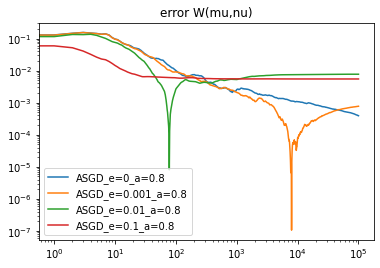

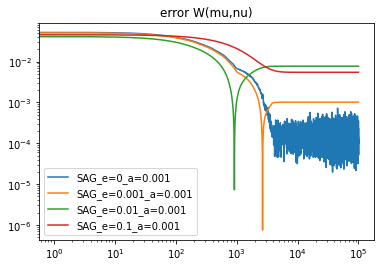

In [32]:
plt.figure()
for i_e in range(len(list_epsilon)):
    epsilon = list_epsilon[i_e]
    for i_a in range(len(list_alpha_ASGD)):
        alpha = alpha = list_alpha_ASGD[i_a]
        plt.plot(np.abs(W_ASGD1[:,i_e,i_a]-W_theo1),label = 'ASGD_e='+str(epsilon)+'_a='+str(alpha))
plt.xscale('log')
plt.yscale('log')
plt.title('error W(mu,nu)')
plt.legend()

plt.figure()
for i_e in range(len(list_epsilon)):
    epsilon = list_epsilon[i_e]
    for i_a in range(len(list_alpha_SAG)):
        alpha = list_alpha_SAG[i_a]
        plt.plot(np.abs(W_SAG1[:,i_e,i_a]-W_theo1),label = 'SAG_e='+str(epsilon)+'_a='+str(alpha))
plt.xscale('log')
plt.yscale('log')
plt.title('error W(mu,nu)')
plt.legend()

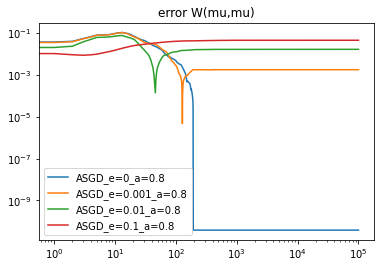

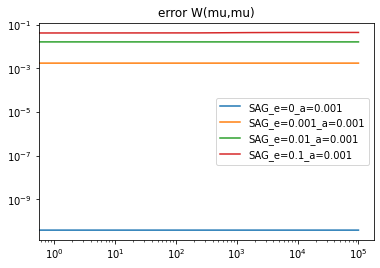

In [33]:
plt.figure()
for i_e in range(len(list_epsilon)):
    epsilon = list_epsilon[i_e]
    for i_a in range(len(list_alpha_ASGD)):
        alpha = alpha = list_alpha_ASGD[i_a]
        plt.plot(np.abs(W_ASGD2[:,i_e,i_a]-W_theo2),label = 'ASGD_e='+str(epsilon)+'_a='+str(alpha))
plt.xscale('log')
plt.yscale('log')
plt.title('error W(mu,mu)')
plt.legend()

plt.figure()
for i_e in range(len(list_epsilon)):
    epsilon = list_epsilon[i_e]
    for i_a in range(len(list_alpha_SAG)):
        alpha = list_alpha_SAG[i_a]
        plt.plot(np.abs(W_SAG2[:,i_e,i_a]-W_theo2),label = 'SAG_e='+str(epsilon)+'_a='+str(alpha))
plt.xscale('log')
plt.yscale('log')
plt.title('error W(mu,mu)')
plt.legend()

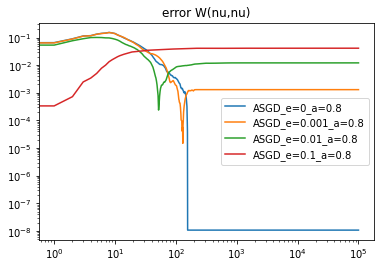

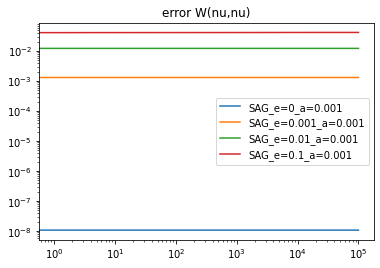

In [34]:
plt.figure()
for i_e in range(len(list_epsilon)):
    epsilon = list_epsilon[i_e]
    for i_a in range(len(list_alpha_ASGD)):
        alpha = alpha = list_alpha_ASGD[i_a]
        plt.plot(np.abs(W_ASGD3[:,i_e,i_a]-W_theo3),label = 'ASGD_e='+str(epsilon)+'_a='+str(alpha))
plt.xscale('log')
plt.yscale('log')
plt.title('error W(nu,nu)')
plt.legend()

plt.figure()
for i_e in range(len(list_epsilon)):
    epsilon = list_epsilon[i_e]
    for i_a in range(len(list_alpha_SAG)):
        alpha = list_alpha_SAG[i_a]
        plt.plot(np.abs(W_SAG3[:,i_e,i_a]-W_theo3),label = 'SAG_e='+str(epsilon)+'_a='+str(alpha))
plt.xscale('log')
plt.yscale('log')
plt.title('error W(nu,nu)')
plt.legend()

In [50]:
    S_asgd = np.zeros([len(list_epsilon),len(list_alpha_ASGD)])
    S_sag = np.zeros([len(list_epsilon),len(list_alpha_ASGD)])

    S_asgd = W_ASGD1[-1,:,:] - 1/2 * ( W_ASGD2[-1,:,:] + W_ASGD3[-1,:,:])
    S_sag = W_SAG1[-1,:,:] - 1/2 * ( W_SAG2[-1,:,:] + W_SAG3[-1,:,:])


In [52]:
    for i_e in range(len(list_epsilon)):
        epsilon = list_epsilon[i_e]
        for i_a in range(len(list_alpha_ASGD)):
            alpha = alpha = list_alpha_ASGD[i_a]
            print('error of S (asgd), eps='+str(epsilon)+', alpha='+str(alpha)+' : '+str(S_asgd[i_e,i_a]-W_theo1))
            print('error of W (asgd), eps='+str(epsilon)+', alpha='+str(alpha)+' : '+str(W_ASGD1[-1,i_e,i_a]-W_theo1))
    for i_e in range(len(list_epsilon)):
        epsilon = list_epsilon[i_e]    
        for i_a in range(len(list_alpha_SAG)):
            alpha = list_alpha_SAG[i_a]
            print('error of S (sag), eps='+str(epsilon)+', alpha='+str(alpha)+' : '+str(S_sag[i_e,i_a]-W_theo1))
            print('error of W (sag), eps='+str(epsilon)+', alpha='+str(alpha)+' : '+str(W_SAG1[-1,i_e,i_a]-W_theo1))

error of S (asgd), eps=0, alpha=0.8 : -0.00039243115907253157
error of W (asgd), eps=0, alpha=0.8 : -0.00039243115907253157
error of S (asgd), eps=0.001, alpha=0.8 : -0.0007317088120807336
error of W (asgd), eps=0.001, alpha=0.8 : 0.0007735590668514203
error of S (asgd), eps=0.01, alpha=0.8 : -0.006337719054397867
error of W (asgd), eps=0.01, alpha=0.8 : 0.007714204477664771
error of S (asgd), eps=0.1, alpha=0.8 : -0.04770742174336895
error of W (asgd), eps=0.1, alpha=0.8 : -0.005482791442664836
error of S (sag), eps=0, alpha=0.001 : -0.00012597449116688586
error of W (sag), eps=0, alpha=0.001 : -0.00012597449116688586
error of S (sag), eps=0.001, alpha=0.001 : -0.00048752582542069267
error of W (sag), eps=0.001, alpha=0.001 : 0.0010177423909083771
error of S (sag), eps=0.01, alpha=0.001 : -0.006326136901363716
error of W (sag), eps=0.01, alpha=0.001 : 0.007728830016053484
error of S (sag), eps=0.1, alpha=0.001 : -0.047716221428242445
error of W (sag), eps=0.1, alpha=0.001 : -0.0054826